In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
bcell_df = pd.read_csv(os.path.join('data','input_bcell.csv'))
bcell_df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [3]:
sars_df = pd.read_csv(os.path.join('data','input_sars.csv'))
sars_df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


## Protein feature Engineering and experimentation

In [4]:
protein_seq_example = bcell_df.protein_seq.values.reshape(-1,1)[0]
peptide_seq_example = bcell_df.peptide_seq.values.reshape(-1,1)[0]


In [5]:
protein_seq_example

array(['MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEFQTGGIGNLPIRNWNFNFGLLGTTLLNLDANYVETARNTIDYFVDFVDNVCMDEMVRESQRNGIAPQSDSLRKLSAIKFKRINFDNSSEYIENWNLQNRRQRTGFTFHKPNIFPYSASFTLNRSQPAHDNLMGTMWLNAGSEIQVAGFDYSCAINAPANIQQFEHIVPLRRVLTTATITLLPDAERFSFPRVINSADGATTWFFNPVILRPNNVEVEFLLNGQIINTYQARFGTIVARNFDTIRLSFQLMRPPNMTPAVAVLFPNAQPFEHHATVGLTLRIESAVCESVLADASETLLANVTSVRQEYAIPVGPVFPPGMNWTDLITNYSPSREDNLQRVFTVASIRSMLIK'],
      dtype=object)

In [6]:
peptide_seq_example

array(['SASFT'], dtype=object)

Biophysical quantitative properties that are also Features that need to be made from protein and peptides
* mass
* length
The rest have been provided

dictionary of protein mass

In [7]:
protein_dict = {'A':89, 'R':174, 'N':132, 'D':133,
                'B':133, 'C':121, 'Q':146, 'E':147,
                'Z':147, 'G':75, 'H':155, 'I':131,
                'L':131, 'K':146, 'M':149, 'F':165,
                'P':115, 'S':105, 'T':119, 'W':204,
                'Y':181, 'V':117}

In [8]:
# mass maker function
def mass_list_maker(df_and_column):
    mass_lst = []
    for i in df_and_column:
        mass = 0
        for j in i:
            mass = mass + protein_dict[j]
        mass_lst.append(mass)
    return mass_lst

In [9]:
def len_list_maker(df_and_column):
    return [len(i) for i in df_and_column]

Mass of protien Testing

In [10]:
protein_mass_lst = mass_list_maker(bcell_df.protein_seq)
protein_mass_lst[0:10]

[51950, 42734, 25675, 120095, 33875, 33875, 33875, 33875, 33875, 49762]

Length of protein testing

In [11]:
protein_length_lst=[len(i) for i in bcell_df.protein_seq]
protein_length_lst[:10]

[397, 336, 207, 1005, 260, 260, 260, 260, 260, 386]

Mass of Peptide Testing

In [12]:
peptide_length_lst=[len(i) for i in bcell_df.peptide_seq]
peptide_length_lst[:10]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

length of Peptide testing

In [13]:
peptide_mass_lst = mass_list_maker(bcell_df.peptide_seq)
peptide_mass_lst[0:10]

[583, 660, 684, 684, 682, 615, 588, 686, 620, 721]

## Adding more features in the sars and bcell dataframe

In [14]:
sars_df.head() # This is the testing set

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [15]:
sars_df['protein_seq_mass'] = mass_list_maker(sars_df.protein_seq)
sars_df['protein_seq_length'] = len_list_maker(sars_df.protein_seq)

sars_df['peptide_seq_mass'] = mass_list_maker(sars_df.peptide_seq)
sars_df['peptide_seq_length'] = len_list_maker(sars_df.peptide_seq)

sars_df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,protein_seq_mass,protein_seq_length,peptide_seq_mass,peptide_seq_length
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0,161643,1255,2219,17
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0,161643,1255,1955,15
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0,161643,1255,1269,9
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0,161643,1255,1892,15
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0,161643,1255,2132,17


In [16]:
bcell_df.head() # This is the training and validation

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [17]:
bcell_df['protein_seq_mass'] = mass_list_maker(bcell_df.protein_seq)
bcell_df['protein_seq_length'] = len_list_maker(bcell_df.protein_seq)

bcell_df['peptide_seq_mass'] = mass_list_maker(bcell_df.peptide_seq)
bcell_df['peptide_seq_length'] = len_list_maker(bcell_df.peptide_seq)

bcell_df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,protein_seq_mass,protein_seq_length,peptide_seq_mass,peptide_seq_length
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1,51950,397,583,5
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1,42734,336,660,5
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1,25675,207,684,5
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1,120095,1005,684,5
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1,33875,260,682,5


## Making the training, validation, and testing datasets

### Training and Validation

In [18]:
X, y = bcell_df.drop(['parent_protein_id','protein_seq','peptide_seq','target'], axis=1), bcell_df.target.values.reshape(-1,1)
X, y

(       start_position  end_position  chou_fasman  emini  kolaskar_tongaonkar  \
 0                 161           165        1.016  0.703                1.018   
 1                 251           255        0.770  0.179                1.199   
 2                 145           149        0.852  3.427                0.960   
 3                 152           156        1.410  2.548                0.936   
 4                  85            89        1.214  1.908                0.937   
 ...               ...           ...          ...    ...                  ...   
 14382             177           191        0.910  0.175                1.054   
 14383             285           299        0.966  0.216                1.044   
 14384             189           203        0.821  0.023                1.044   
 14385            1479          1493        1.069  0.239                1.037   
 14386            1647          1661        0.962  0.257                1.045   
 
        parker  isoelectri

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_test, y_test = sars_df.drop(['parent_protein_id','protein_seq','peptide_seq','target'], axis=1), sars_df.target.values.reshape(-1,1)

### "Min, max"-ing and Categorising the data  

In [21]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
y_test_categorical = to_categorical(y_test)

C:\Users\Ayman\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ayman\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ayman\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ayman\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

## Creating the nerual network model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1048, activation='relu'))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096*2, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(
    X_train_scaled,
    y_train_categorical,
    batch_size=128,
    epochs=250,
    shuffle=True,
    verbose=1,
    validation_data=(X_val_scaled, y_val_categorical)
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1048)              537624    
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              2148352   
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4

In [23]:
history_df = pd.DataFrame(history.history)

<AxesSubplot:>

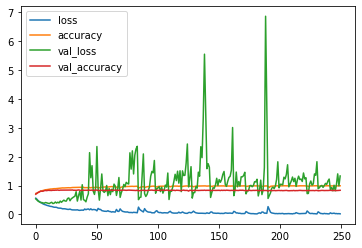

In [24]:
history_df.plot()

This is overfitting so lets try something else

### Added Dropouts between each layer at 0.5

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                960       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)              

<AxesSubplot:>

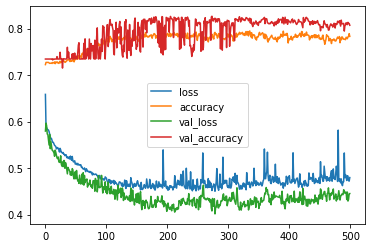

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4096*2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(
    X_train_scaled,
    y_train_categorical,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=1,
    validation_data=(X_val_scaled, y_val_categorical)
)

history_df = pd.DataFrame(history.history)
history_df.plot()

### Adding dropouts at a rate at 0.3

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                960       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)              

<AxesSubplot:>

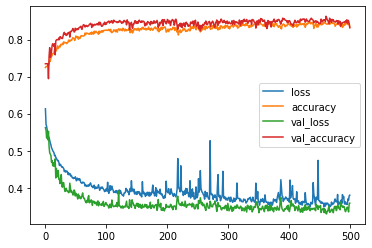

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4096*2, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(
    X_train_scaled,
    y_train_categorical,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=1,
    validation_data=(X_val_scaled, y_val_categorical)
)

history_df = pd.DataFrame(history.history)
history_df.plot()

### Trying to apply a keras hyperperameters to find the perfect model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter
import time

LOG_DIR = f'logs/{int(time.time())}'

def build_model(hp):

        model = Sequential()
        model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
        model.add(Dropout(0.3))
        model.add(Dense(units=128, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=256, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=512, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=1048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=4096, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=4096*2, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(units=2, activation='softmax'))

        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model
        
tuner = RandomSearch(
    build_model,
    objective = 'val_accuaracy',
    max_trials = 1,
    executions_per_trials = 1,
    directory = LOG_DIR
)

tuner.serach(
    x = X_train,
    y = y_train,
    epochs = 10,
    batch_size = 128,
    validation_data=(X_val,y_val)
)

# print(model.summary())

# history = model.fit(
#     X_train_scaled,
#     y_train_categorical,
#     batch_size=128,
#     epochs=500,
#     shuffle=True,
#     verbose=1,
#     validation_data=(X_val_scaled, y_val_categorical)
# )

# history_df = pd.DataFrame(history.history)
# history_df.plot()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Ayman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-512cb11a31fd>", line 47, in <module>
    directory = LOG_DIR
  File "C:\Users\Ayman\anaconda3\lib\site-packages\kerastuner\tuners\randomsearch.py", line 171, in __init__
    allow_new_entries=allow_new_entries)
  File "C:\Users\Ayman\anaconda3\lib\site-packages\kerastuner\tuners\randomsearch.py", line 66, in __init__
    allow_new_entries=allow_new_entries)
  File "C:\Users\Ayman\anaconda3\lib\site-packages\kerastuner\engine\oracle.py", line 64, in __init__
    self.objective = _format_objective(objective)
  File "C:\Users\Ayman\anaconda3\lib\site-packages\kerastuner\engine\oracle.py", line 384, in _format_objective
    raise ValueError(error_msg)
ValueError: Could not infer optimization direction ("min" or "max") for unknown metric "val_accuaracy". Please specify t

TypeError: object of type 'NoneType' has no len()